<a href="https://colab.research.google.com/github/RAK789266/http-localhost-8888-notebooks-Untitled13.ipynb-kernel_name-python3/blob/main/House%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving HousePricePrediction.xlsx to HousePricePrediction.xlsx


{'HousePricePrediction.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xc8\xa3\xcd4v\x01\x00\x00\x04\x05\x00\x00\x13\x00\xdd\x01[Content_Types].xml \xa2\xd9\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
dataset.shape

(2919, 13)

<Axes: >

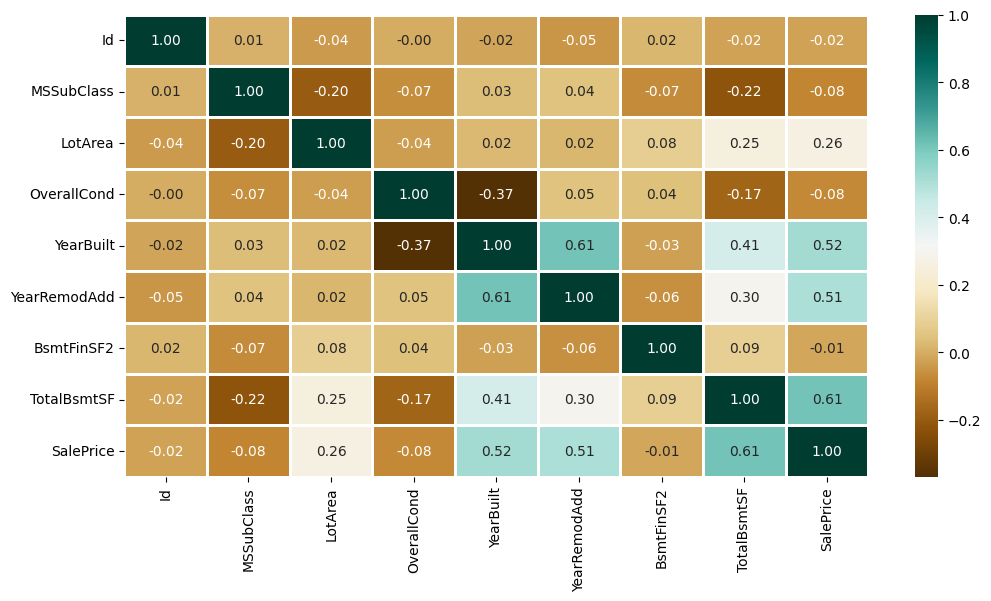

In [7]:
# select only numerical feature for correlation

numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

([0, 1, 2, 3],
 [Text(0, 0, 'MSZoning'),
  Text(1, 0, 'LotConfig'),
  Text(2, 0, 'BldgType'),
  Text(3, 0, 'Exterior1st')])

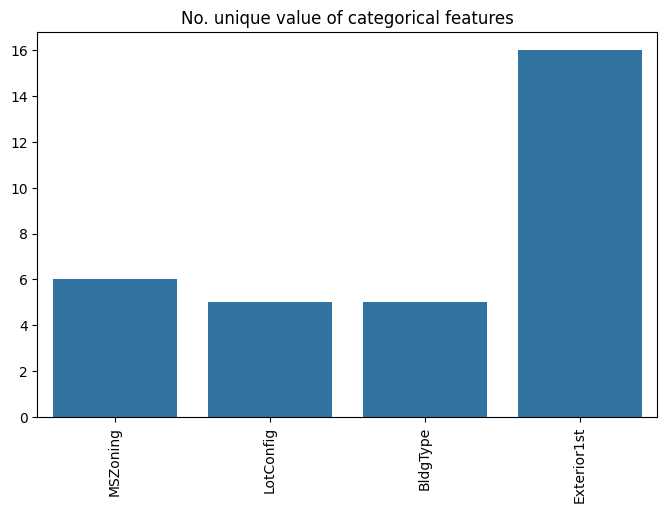

In [14]:
object_cols = dataset.select_dtypes(include=['object']).columns.tolist()

unique_values = []
for col in object_cols:   # object_cols - to read the object column sets like MSZoning, LotConfig
  unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(8,5))
plt.title('No. unique value of categorical features')
sns.barplot(x=object_cols,
            y=unique_values)
plt.xticks(rotation=90)

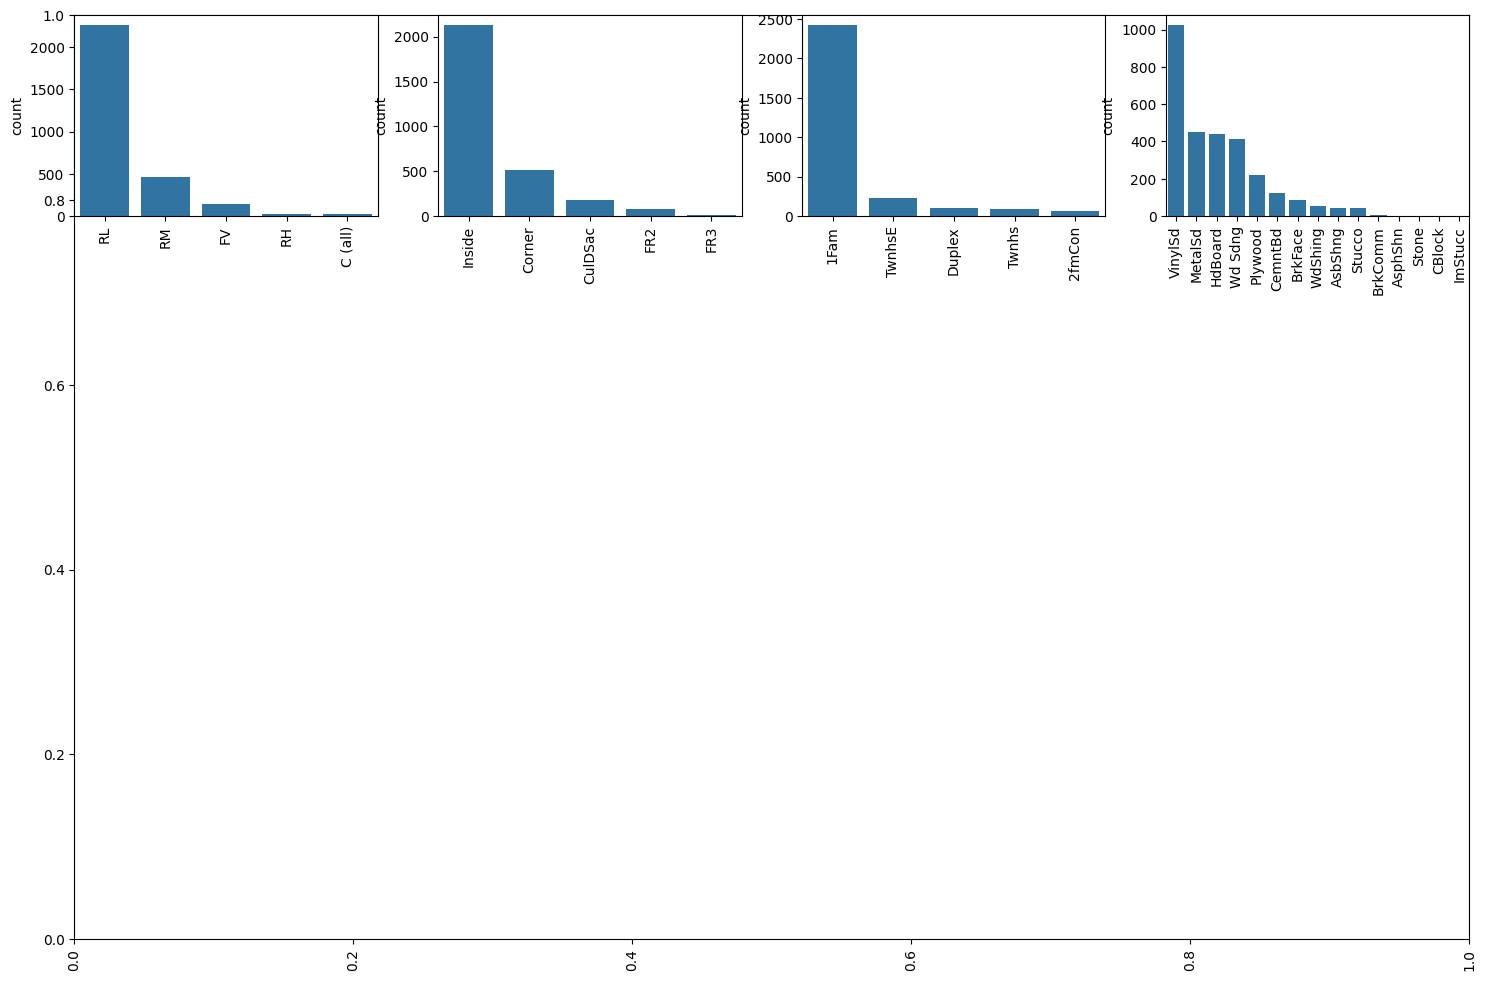

In [20]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=90)

index=1

for col in object_cols:
  y = dataset[col].value_counts()
  plt.subplot(4,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index += 1


In [21]:
# data cleaning

# id column will not be participating in any prediction. so we can drop it

dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [23]:
# Replace sales price empty value with their mean values to make the data distribution symmetric

dataset['SalePrice']=dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

OneHotEncoder - For label categorial feature

is the best way to convert categorial data into binary vectors. This maps the value to integer values. By using onehotencoder, we can easily convert object into int. So for that, firstly we have to collect all the feature which have the object datatype.



In [25]:
new_dataset = dataset.dropna()

from sklearn.preprocessing import OneHotEncoder

s=(new_dataset.dtypes=='object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [32]:
object_cols = new_dataset.select_dtypes(include=['object']).columns.tolist()
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)



In [33]:
df_final.head(5)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Splitting Dataset into Training and Testing**

X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
y = df_final.SalePrice

# Split the training set into
# training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)

Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine

Random Forest Regressor

Linear Regressor

And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error :

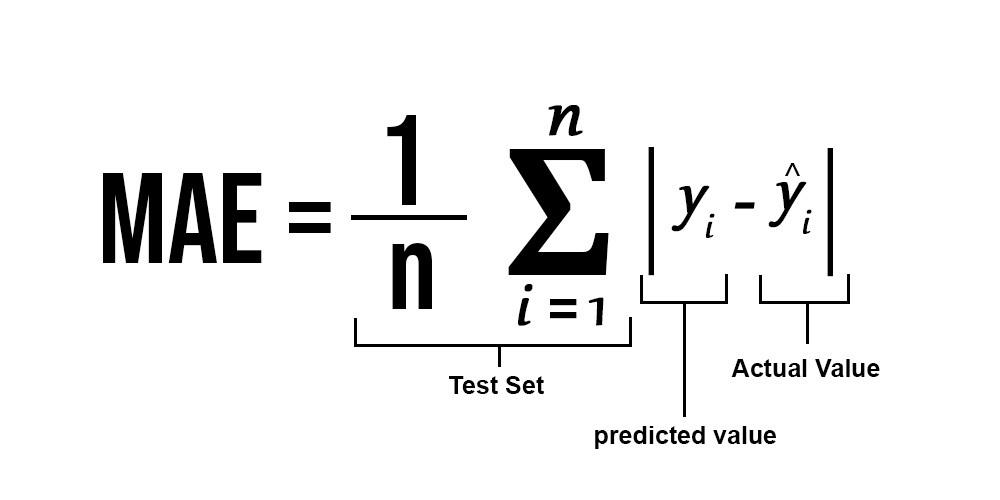



**SVM – Support vector Machine**

SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane

In [39]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.1870512931870423


**Random Forest Regression**

Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(y_valid, y_pred)

0.18868142158911635